In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline


In [29]:
# iris_data header name 
iris_data = pd.read_csv('IRIS.csv')

In [30]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,response
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
iris_data.response.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
iris_data['resp_labels'] = pd.Categorical(iris_data['response']).codes
iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,response,resp_labels
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [6]:
# seperate the predictors x and response y
x = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_data[['response']]

In [7]:
colors_iris = np.array(['red', 'blue', 'green'])


In [8]:
#1 - import KMeans
from sklearn.cluster import KMeans

In [9]:
# 2 - Intantiate the model
km = KMeans(3, random_state=2)

In [10]:
# 3 - fit the model
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [11]:
km.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [34]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [12]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,response,resp_labels
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [16]:
iris_data['cluster_pred_labels'] = km.labels_
iris_data.head(10)

#iris_data['cluster_pred_labels'] = np.choose(km.labels_, [1,0,2]).astype(np.int64)

,sepal_length,sepal_width,petal_length,petal_width,response,resp_labels,cluster_pred_labels
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0,0


In [17]:
centroids = km.cluster_centers_
centroids

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

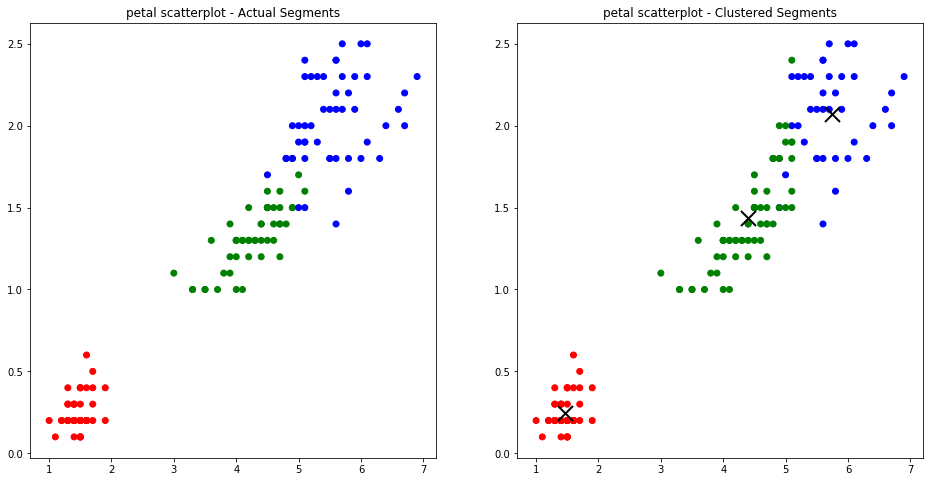

In [18]:
# compare the actual segments vs Cluster segments labels
plt.figure(figsize=(16,8))
color_mapping = np.array(['red', 'green', 'blue'])

# scatter plot of petal length vs petal width by using color as response var
plt.subplot(1,2,1)
plt.scatter(x=iris_data.petal_length, y=iris_data.petal_width, c=color_mapping[iris_data.resp_labels])
plt.title('petal scatterplot - Actual Segments')


# scatter plot of petal length vs petal width by using color as Cluster Labels
plt.subplot(1,2,2)
plt.scatter(x=iris_data.petal_length, y=iris_data.petal_width, c=color_mapping[iris_data.cluster_pred_labels])
#plt.scatter(x=iris_data.petal_length, y=iris_data.petal_width, c=color_mapping[iris_data.resp_labels])
plt.title('petal scatterplot - Clustered Segments')

# plot the centriod for k=3 for petals (x,y)
n=3
for i in range(n):
    lines = plt.plot(centroids[i,2],centroids[i,3],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)



#### The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). 
- b is the distance between a sample and the nearest cluster that the sample is not a part of. 

###   Silhouette Coefficient : The best value is 1 and the worst value is -1.  
#### Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [19]:
# Calculate the shine silhouette_score with K=3.  Higher the SS_score, the better defined cluster
metrics.silhouette_score(x, iris_data.cluster_pred_labels, metric='euclidean', sample_size=150)


0.5525919445213676

In [20]:
# Set the diff values of K 
k_range = range(2,7)


# # Fit the model 
k_fit_vars = [KMeans(n_clusters=k).fit(x) for k in k_range]

# # Center for each model
k_centroids = [model.cluster_centers_ for model in k_fit_vars]


In [21]:
k_centroids

[array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
        [5.00566038, 3.36037736, 1.56226415, 0.28867925]]),
 array([[5.006     , 3.418     , 1.464     , 0.244     ],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]]),
 array([[5.006     , 3.418     , 1.464     , 0.244     ],
        [6.23658537, 2.85853659, 4.80731707, 1.62195122],
        [6.9125    , 3.1       , 5.846875  , 2.13125   ],
        [5.52962963, 2.62222222, 3.94074074, 1.21851852]]),
 array([[6.52916667, 3.05833333, 5.50833333, 2.1625    ],
        [5.006     , 3.418     , 1.464     , 0.244     ],
        [6.20769231, 2.85384615, 4.74615385, 1.56410256],
        [7.475     , 3.125     , 6.3       , 2.05      ],
        [5.508     , 2.6       , 3.908     , 1.204     ]]),
 array([[4.71304348, 3.12173913, 1.4173913 , 0.19130435],
        [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
        [5.508     , 2.6       , 3.908     , 1.204     ],
      

In [22]:
# calcuate eucleadean distance
from scipy.spatial.distance import cdist

# cal dist from each observation to each center
k_euclid_dist = [cdist(x, centroid, 'euclidean') for centroid in k_centroids]
min_euclid_dist = [np.min(k_euclid, axis=1) for k_euclid in k_euclid_dist]

# # total with-in sum-of-square 
within_sum_sq = [sum(dist**2) for dist in min_euclid_dist]
within_sum_sq


[152.36870647733912,
 78.94084142614602,
 57.34540931571817,
 46.53558205128205,
 38.930963049671746]

Text(0,0.5,'Within in Sum of sq variance')

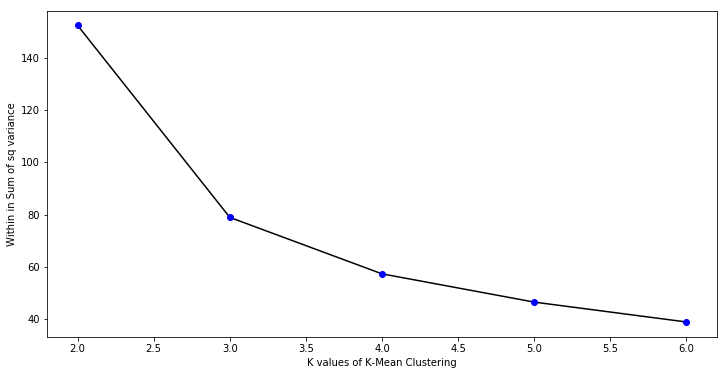

In [23]:
# plot the within-sum-sq vs K
plt.figure(figsize=(12,6))
plt.plot(k_range, within_sum_sq, 'k', k_range, within_sum_sq, 'bo')
plt.xlabel('K values of K-Mean Clustering')
plt.ylabel('Within in Sum of sq variance')  